In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC



print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
data = pd.read_csv(r'MSB-Mortgage-Backed-Securities-Pipeline-main-LoanExport-Revised1.csv')

In [3]:
data.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
0,16974,25,1,89,27,117000,6.750,3,0,15,...,2029,1,0,0,0,3,0,1,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,...,2029,1,0,0,0,1,1,0,1,0
2,29940,0,1,75,16,88000,6.875,3,0,17,...,2029,1,0,0,0,3,1,0,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,...,2029,1,0,0,0,0,1,0,1,0
4,35644,0,1,78,18,109000,7.125,2,0,32,...,2029,1,0,0,0,3,1,0,1,0


In [4]:
data.tail()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,...,MaturityYear,MaturityMonth,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RePayRange,LoanPurpose_N,LoanPurpose_P,Occupancy_O,Occupancy_S
291398,37964,0,1,60,32,90000,7.000,2,0,39,...,2029,2,0,0,0,0,1,0,1,0
291399,35644,0,1,73,0,267000,6.375,1,0,35,...,2029,4,0,0,0,3,0,1,1,0
291400,42044,0,1,73,31,87000,5.625,2,0,4,...,2029,4,0,0,0,0,1,0,1,0
291401,37964,0,1,80,54,88000,7.000,2,0,39,...,2029,3,0,0,0,0,0,1,0,0
291402,37964,0,1,47,29,70000,7.000,2,0,39,...,2029,2,0,2,0,0,0,1,1,0


In [5]:
#Print the shape of the DataFrame
print("The shape of data frame:", data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(data.columns))

The shape of data frame: (291403, 30)
Number of Rows in the dataframe: 291403
Number of Columns in the dataframe: 30


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">FEATURE SELECTION</h2>
</div>

### <span style='color:blue'>1] TRAIN AND TEST DATASET SPLIT </span> 

In [6]:
x= data.drop('EverDelinquent', axis=1)
y = data.EverDelinquent

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### <span style='color:blue'>2] MUTUAL INFORMATION SCORE</span> 

In [7]:
# importing library for mi score for classification 
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([3.81909285e-03, 7.43176882e-03, 3.59831497e-02, 4.81790703e-03,
       3.53593563e-03, 2.78618429e-03, 5.41386195e-03, 1.95371818e-02,
       0.00000000e+00, 4.35327810e-03, 3.27929738e-02, 3.63337986e-02,
       2.44507452e-02, 9.59069537e-03, 1.36991103e-02, 4.98040079e-01,
       3.05866397e-02, 2.66705525e-02, 1.36553748e-02, 2.78064827e-02,
       1.14560946e-02, 1.18197464e-04, 2.63716348e-03, 4.19614012e-02,
       3.13851135e-02, 4.55461283e-03, 6.81376681e-03, 3.39603543e-02,
       2.24787879e-04])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

MonthsDelinquent        0.498040
CreditRange             0.041961
OrigLoanTerm            0.036334
Units                   0.035983
Occupancy_O             0.033960
PropertyType            0.032793
RePayRange              0.031385
MonthsInRepayment       0.030587
MaturityYear            0.027806
FirstPaymentYear        0.026671
NumBorrowers            0.024451
Channel                 0.019537
ServicerName            0.013699
FirstPaymentMonth       0.013655
MaturityMonth           0.011456
SellerName              0.009591
MIP                     0.007432
LoanPurpose_P           0.006814
OrigInterestRate        0.005414
OCLTV                   0.004818
LoanPurpose_N           0.004555
PropertyState           0.004353
MSA                     0.003819
DTI                     0.003536
OrigUPB                 0.002786
LTV_Range               0.002637
Occupancy_S             0.000225
IsFirstTimeHomebuyer    0.000118
PPM                     0.000000
dtype: float64

<AxesSubplot:>

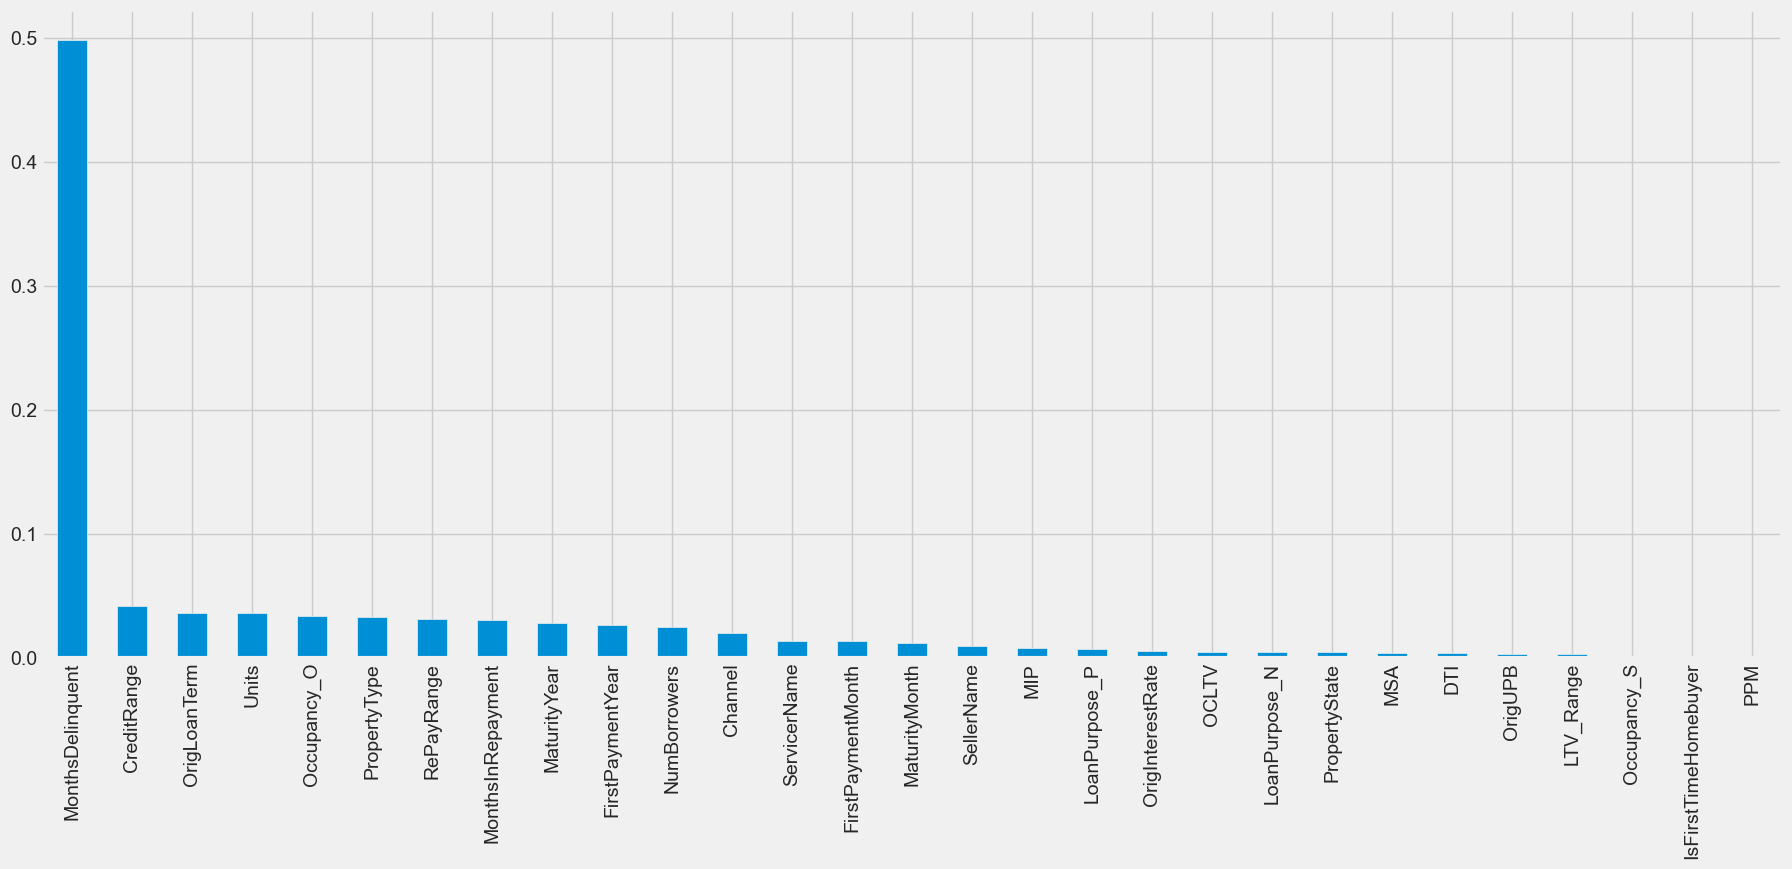

In [9]:
# plot of mi score for features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
# For selecting best feature based on mi score
from sklearn.feature_selection import SelectKBest
#Now we Will select the  top 10 important features
selector= SelectKBest(mutual_info_classif, k=10)
x_train_selected=selector.fit_transform(x_train, y_train)
x_test_selected=selector.transform(x_test)

In [11]:
selected_features=x_train.columns[selector.get_support()]
x_beast=pd.DataFrame(x_train_selected,columns=selected_features)
x_beast.head()

,Units,PropertyType,OrigLoanTerm,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,MaturityYear,CreditRange,RePayRange,Occupancy_O
0,1.0,5.0,360.0,0.0,49.0,1999.0,2029.0,2.0,3.0,1.0
1,1.0,0.0,360.0,0.0,36.0,1999.0,2029.0,3.0,0.0,1.0
2,1.0,4.0,360.0,0.0,59.0,1999.0,2029.0,3.0,3.0,0.0
3,1.0,5.0,360.0,0.0,149.0,1999.0,2029.0,0.0,1.0,1.0
4,1.0,5.0,360.0,0.0,44.0,1999.0,2029.0,0.0,0.0,1.0


In [12]:
selected_features=x_train.columns[selector.get_support()]
selected_features

Index(['Units', 'PropertyType', 'OrigLoanTerm', 'MonthsDelinquent',
       'MonthsInRepayment', 'FirstPaymentYear', 'MaturityYear', 'CreditRange',
       'RePayRange', 'Occupancy_O'],
      dtype='object')

### <span style='color:blue'>3] STANDARD SCALING </span> 

In [13]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train_selected)
x_test_scaled = scaler.transform(x_test_selected)

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">MODEL BUILDING </h2>
</div>

### <span style='color:blue'>1] SMOTE </span> 

In [14]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
x_train_os,y_train_os=os.fit_resample(x_train_scaled,y_train)

In [15]:
from collections import Counter
print("The number of classes before fit {}",format(Counter(y_train)))
print("The number of classes after fit {}",format(Counter(y_train_os)))

The number of classes before fit {} Counter({0: 186947, 1: 46175})
The number of classes after fit {} Counter({0: 186947, 1: 186947})


In [16]:
Non_Delinquent= (y_train_os.value_counts()[0] / y_train_os.shape)[0]
Delinquent= (y_train_os.value_counts()[1] / y_train_os.shape)[0]

print("===============TRAIN=================")
print(f"Non_Delinquent  Rate: {Non_Delinquent  * 100:.2f}%")
print(f"Delinquent  Rate: {Delinquent  * 100 :.2f}%")

Non_Delinquent= (y_test.value_counts()[0] / y_test.shape)[0]
Delinquent = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Non_Delinquent  Rate: {Non_Delinquent  * 100:.2f}%")
print(f"Delinquent  Rate: {Delinquent  * 100 :.2f}%")

===============TRAIN=================
Non_Delinquent  Rate: 50.00%
Delinquent  Rate: 50.00%
===============TEST=================
Non_Delinquent  Rate: 80.31%
Delinquent  Rate: 19.69%


In [17]:
def evaluate(model, x_train_os, x_test_scaled, y_train_os, y_test):
    y_test_pred = model.predict(x_test_scaled)
    y_train_pred = model.predict(x_train_os)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train_os, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_os, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train_os, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOGISTIC REGRESSION</h2>
</div>

In [18]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [19]:
evaluate(model_lr, x_train_os, x_test_scaled, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[186947      0]
 [     0 186947]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    186947.0  186947.0       1.0   373894.0      373894.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[46804     0]
 [    0 11477]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    46804.0  11477.0       1.0    58281.0       58281.0


In [25]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
x_train_scale= scaler.fit_transform(x_train_new)
x_test_scale = scaler.transform(x_test_new)

In [27]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
x_train_resample,y_train_resample=os.fit_resample(x_train_scale,y_train)

In [28]:
from sklearn.feature_selection import RFE
# Feature selection with RFE
log_reg = LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l2', C=0.001)
selector = RFE(log_reg, n_features_to_select=10, step=1)
selector = selector.fit(x_train_resample, y_train_resample)
selected_features = selector.support_
X_train_selected= x_train_resample[:, selected_features]
X_test_selected = x_test_scale[:, selected_features]


In [37]:
log_reg.fit(X_train_selected, y_train_resample)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=5000)

In [38]:
evaluate(log_reg, X_train_selected, X_test_selected, y_train_resample, y_test_new)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[186243    704]
 [ 38349 148598]]
ACCURACY SCORE:
0.8956
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.829250       0.995285  0.895551       0.912268   
recall          0.996234       0.794867  0.895551       0.895551   
f1-score        0.905105       0.883857  0.895551       0.894481   
support    186947.000000  186947.000000  0.895551  373894.000000   

            weighted avg  
precision       0.912268  
recall          0.895551  
f1-score        0.894481  
support    373894.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[46609   195]
 [ 2828  8649]]
ACCURACY SCORE:
0.9481
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.942796      0.977951  0.948131      0.960374      0.949719
recall         0.995834      0.753594  0.948131      0.874714      0.948131
f1-score       0.968589      0.851238  0.948131      0.909913     

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">NAIVE BAYES</h2>
</div>

In [39]:
model_nb = GaussianNB()
model_nb.fit(x_train_os, y_train_os)

GaussianNB()

In [40]:
evaluate(model_nb, x_train_os, x_test_scaled, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[186663    284]
 [     0 186947]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       1.000000       0.998483   0.99924       0.999242   
recall          0.998481       1.000000   0.99924       0.999240   
f1-score        0.999240       0.999241   0.99924       0.999240   
support    186947.000000  186947.000000   0.99924  373894.000000   

            weighted avg  
precision       0.999242  
recall          0.999240  
f1-score        0.999240  
support    373894.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[46746    58]
 [    0 11477]]
ACCURACY SCORE:
0.9990
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.994972  0.999005      0.997486      0.999010
recall         0.998761      1.000000  0.999005      0.999380      0.999005
f1-score       0.999380      0.997480  0.999005      0.998430     

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DECISION TREE</h2>
</div>

In [41]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train_os, y_train_os)

DecisionTreeClassifier(random_state=42)

In [42]:
evaluate(model_dt, x_train_os, x_test_scaled, y_train_os, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[186947      0]
 [     0 186947]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    186947.0  186947.0       1.0   373894.0      373894.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[46804     0]
 [    0 11477]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    46804.0  11477.0       1.0    58281.0       58281.0


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SUPPORT VECTOR MACHINE</h2>
</div>

In [ ]:
model_svm = SVC(kernel='linear')
model_svm.fit(x_train_os, y_train_os)

In [ ]:
evaluate(model_svm, x_train_os, x_test_scaled, y_train_os, y_test)

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LIGHTGBM CLASSIFIER</h2>
</div>

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train_os, y_train_os)

In [ ]:
evaluate(model_lgbm, x_train_os, x_test_scaled, y_train_os, y_test)

### <span style='color:blue'>2] AUC SCORE </span> 

In [ ]:
ml_models = {
    'Logistic Regression': model_lr,
    'Naive Bayes': model_nb,
    'Decision Tree' :model_dt,
    'Support Vector Machine' :model_svm,
    'LightGBM':model_lgbm
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(x_test_scaled)):.3f}")